In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.datasets import imdb
from keras import layers

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
train_data[0][:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

In [4]:
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data])

9999

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict([
    (value, key) for (key, value) in word_index.items()
])
decoded_review = " ".join([
    reverse_word_index.get(i - 3, "?") for i in train_data[0]
])

In [7]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [8]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [11]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [12]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [13]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 101ms/step - loss: 0.5456 - accuracy: 0.7740 - val_loss: 0.4237 - val_accuracy: 0.8573
Epoch 2/20
30/30 [==============================] - 2s 58ms/step - loss: 0.3458 - accuracy: 0.8903 - val_loss: 0.3235 - val_accuracy: 0.8810
Epoch 3/20
30/30 [==============================] - 1s 45ms/step - loss: 0.2614 - accuracy: 0.9117 - val_loss: 0.2879 - val_accuracy: 0.8878
Epoch 4/20
30/30 [==============================] - 1s 50ms/step - loss: 0.2104 - accuracy: 0.9281 - val_loss: 0.2822 - val_accuracy: 0.8853
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1772 - accuracy: 0.9407 - val_loss: 0.2741 - val_accuracy: 0.8890
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1537 - accuracy: 0.9480 - val_loss: 0.2879 - val_accuracy: 0.8840
Epoch 7/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1304 - accuracy: 0.9590 - val_loss: 0.2878 - val_accuracy: 0.8875
Epoch 8/20
3

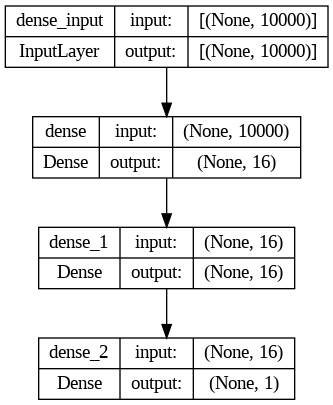

In [15]:
keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
    show_trainable=False
)

In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

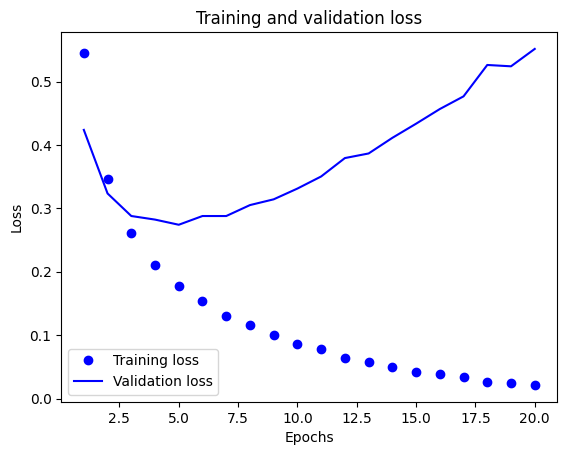

In [17]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

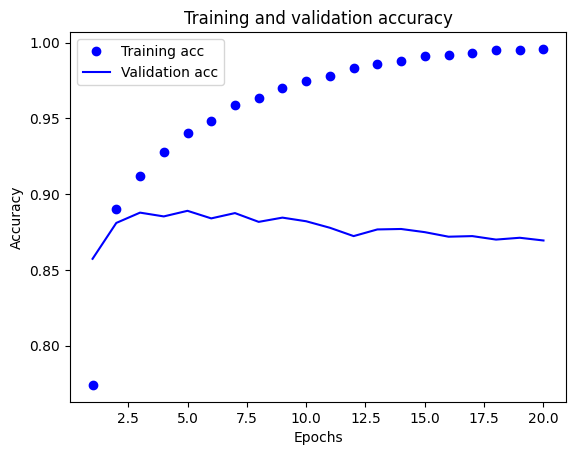

In [18]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [19]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 4s 41ms/step - loss: 0.4545 - accuracy: 0.8135
Epoch 2/4
49/49 [==============================] - 2s 40ms/step - loss: 0.2658 - accuracy: 0.9056
Epoch 3/4
49/49 [==============================] - 2s 43ms/step - loss: 0.2096 - accuracy: 0.9232
Epoch 4/4
782/782 [==============================] - 4s 5ms/step - loss: 0.2882 - accuracy: 0.8853


In [20]:
results

[0.288178414106369, 0.8853200078010559]

In [21]:
model.predict(x_test)

782/782 [==============================] - 2s 3ms/step


array([[0.26750353],
       [0.9998463 ],
       [0.92780656],
       ...,
       [0.09625648],
       [0.08334064],
       [0.6703531 ]], dtype=float32)

Epoch 1/20
30/30 [==============================] - 3s 92ms/step - loss: 0.5501 - accuracy: 0.7659 - val_loss: 0.4147 - val_accuracy: 0.8625
Epoch 2/20
30/30 [==============================] - 1s 50ms/step - loss: 0.3283 - accuracy: 0.8912 - val_loss: 0.3098 - val_accuracy: 0.8825
Epoch 3/20
30/30 [==============================] - 1s 50ms/step - loss: 0.2417 - accuracy: 0.9173 - val_loss: 0.3065 - val_accuracy: 0.8760
Epoch 4/20
30/30 [==============================] - 1s 49ms/step - loss: 0.1899 - accuracy: 0.9351 - val_loss: 0.2758 - val_accuracy: 0.8877
Epoch 5/20
30/30 [==============================] - 2s 63ms/step - loss: 0.1591 - accuracy: 0.9463 - val_loss: 0.3163 - val_accuracy: 0.8750
Epoch 6/20
30/30 [==============================] - 2s 60ms/step - loss: 0.1307 - accuracy: 0.9557 - val_loss: 0.2914 - val_accuracy: 0.8826
Epoch 7/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1052 - accuracy: 0.9687 - val_loss: 0.3245 - val_accuracy: 0.8770
Epoch 8/20
30

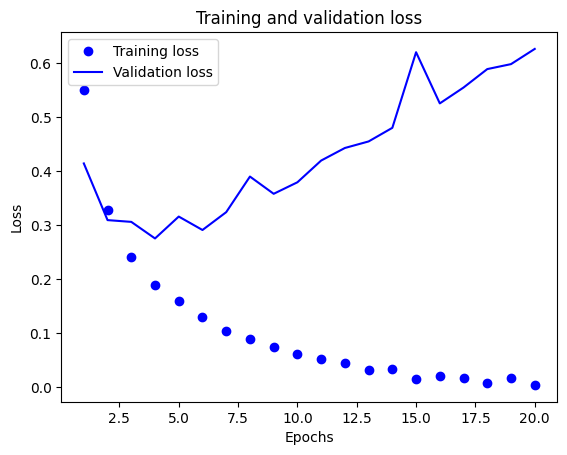

In [22]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

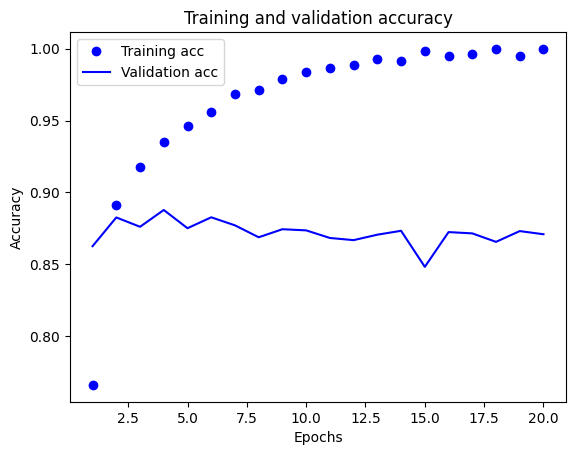

In [23]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Epoch 1/20
30/30 [==============================] - 3s 74ms/step - loss: 0.5011 - accuracy: 0.7897 - val_loss: 0.3995 - val_accuracy: 0.8580
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3276 - accuracy: 0.8949 - val_loss: 0.3344 - val_accuracy: 0.8722
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2591 - accuracy: 0.9177 - val_loss: 0.2955 - val_accuracy: 0.8871
Epoch 4/20
30/30 [==============================] - 2s 78ms/step - loss: 0.2187 - accuracy: 0.9305 - val_loss: 0.2818 - val_accuracy: 0.8897
Epoch 5/20
30/30 [==============================] - 2s 60ms/step - loss: 0.1920 - accuracy: 0.9396 - val_loss: 0.2776 - val_accuracy: 0.8866
Epoch 6/20
30/30 [==============================] - 2s 60ms/step - loss: 0.1700 - accuracy: 0.9474 - val_loss: 0.2759 - val_accuracy: 0.8857
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1525 - accuracy: 0.9537 - val_loss: 0.2811 - val_accuracy: 0.8868
Epoch 8/20
30

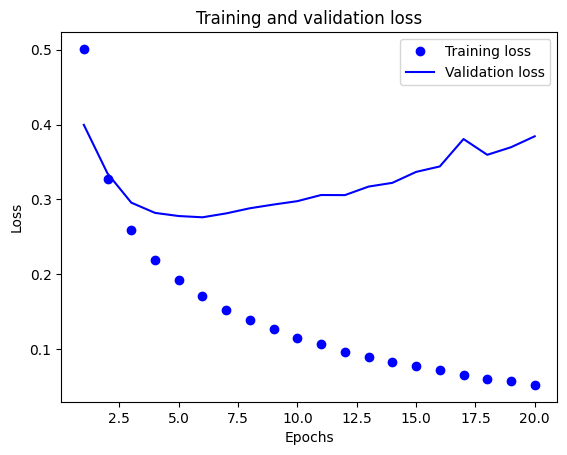

In [24]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

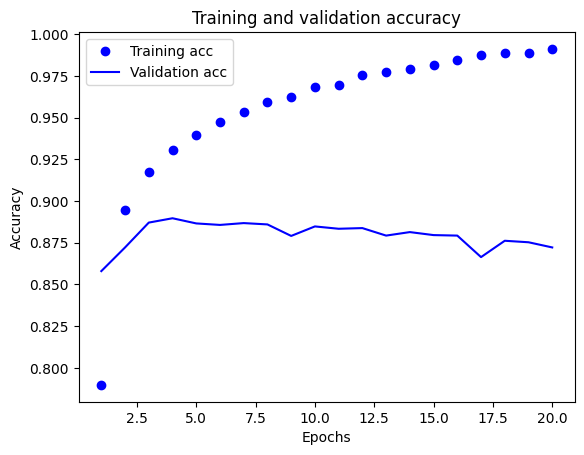

In [25]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()